# TS10: Filtrado digital lineal de ECG
Continuamos con el punto 4 del [TP4](https://nbviewer.org/github/marianux/tps_pds/blob/master/TP4%20-%20Filtrado.ipynb). Realice los incisos c) y d). 
## Resolucion:

In [56]:
import scipy.io as sio
import scipy.signal as sg
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Javascript, HTML
def load_ipython_extension():
    disable_js = """
    IPython.OutputArea.prototype._should_scroll = function(lines) {
        return false;
    }
    """

    display(Javascript(disable_js))

mat_struct = sio.loadmat('ECG_TP4.mat')

fs = 1000
nyq=fs/2

ecg = mat_struct['ecg_lead']

ws0 = 0.5
wp0 = 1
wp1 = 35
ws1 = 45

fs0 = 0.5/nyq   #Hz
fp0 = 1/nyq     #Hz
fp1 = 35/nyq    #Hz
fs1 = 45/nyq    #Hz

gainp = 1
gains = 30

zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )


zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

Text(0, 0.5, 'Amplitud')

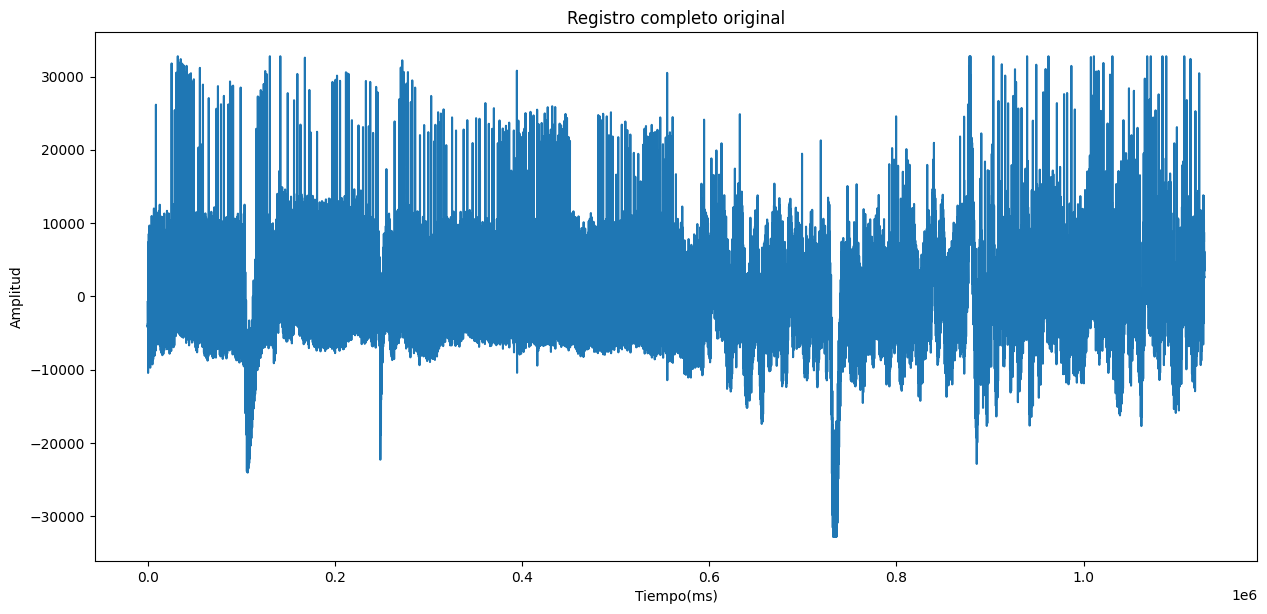

In [57]:
plt.close('all')
plt.figure(0, figsize=(15, 7), dpi=100)
plt.plot(ecg)
plt.title("Registro completo original")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")

<IPython.core.display.Javascript object>

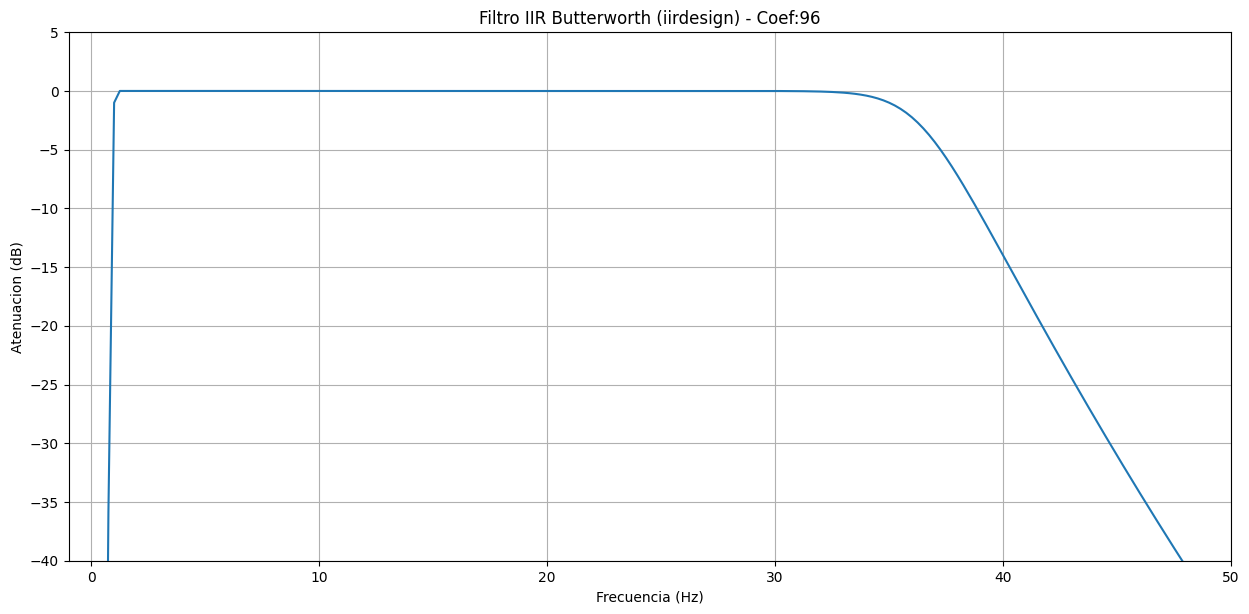

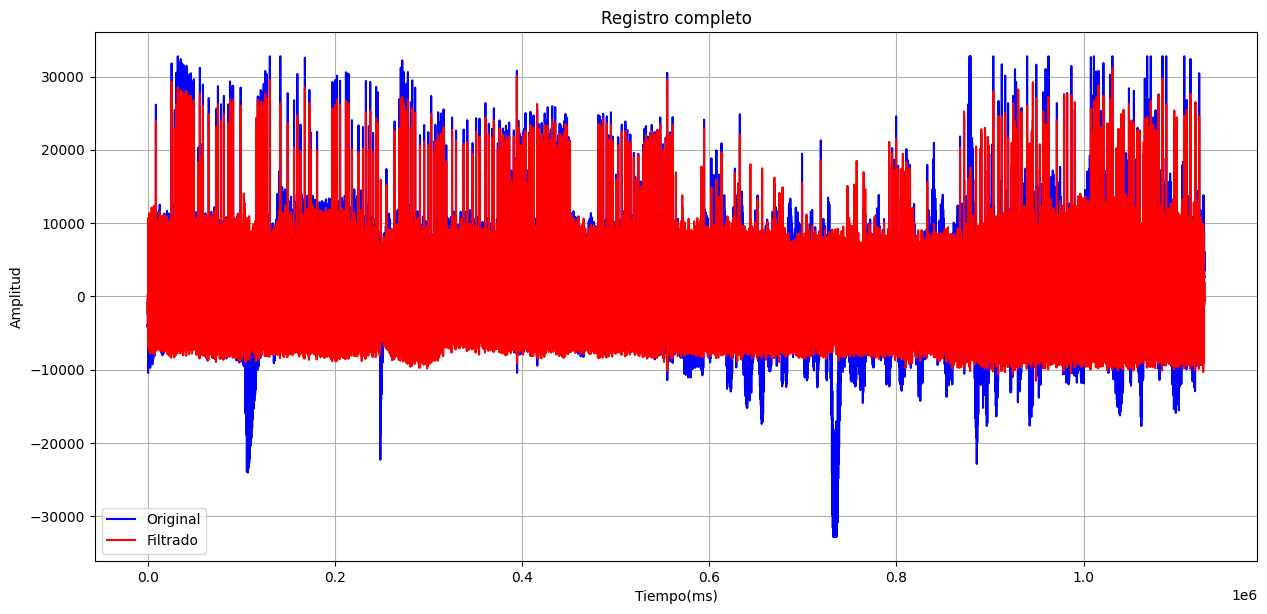

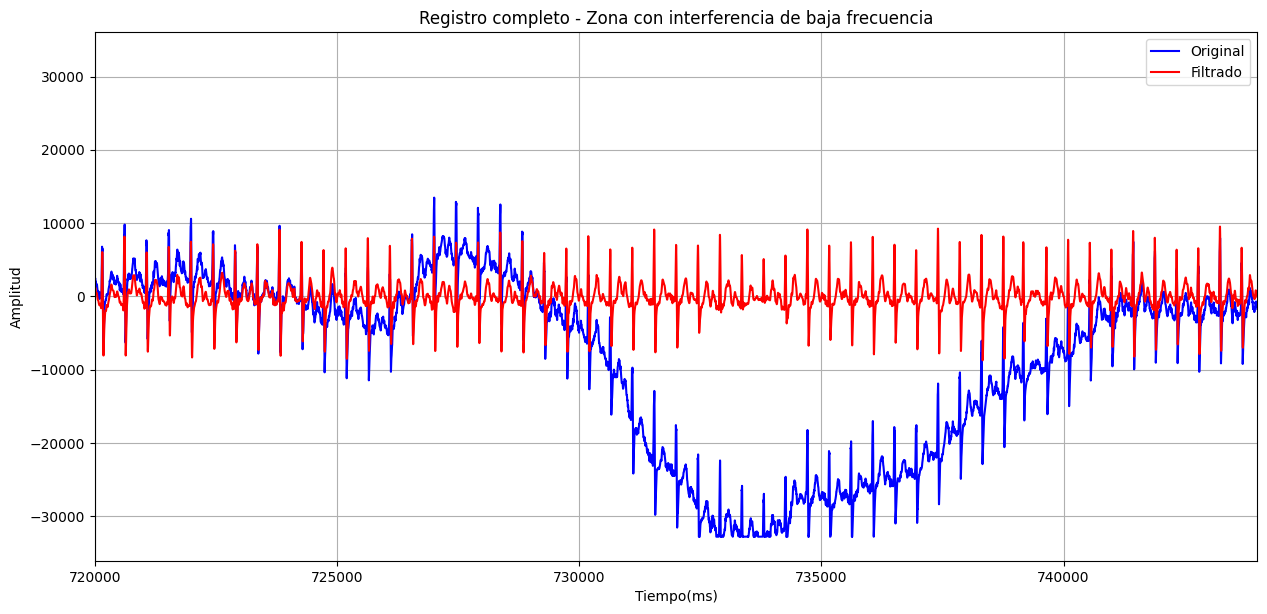

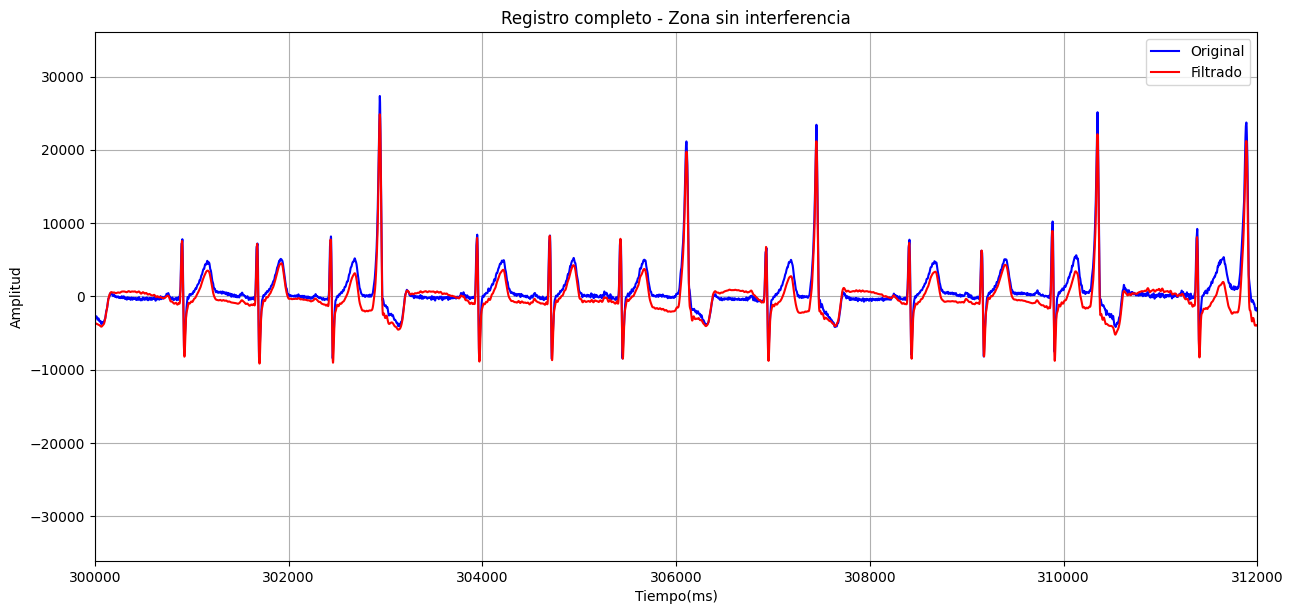

In [58]:
#%%         IIR 1
filtro = sg.iirdesign(wp=[fp0,fp1], ws=[fs0,fs1], gpass=gainp, gstop=gains, ftype='butter', output='sos')
w, h = sg.sosfreqz(filtro, worN=2000, fs=fs)

plt.close('all')
plt.figure(1, figsize=(15, 7), dpi=100)
old = np.seterr(divide='ignore')
plt.plot(w, 20*np.log10(np.abs(h)))
np.seterr(**old)
plt.grid()
plt.title(f"Filtro IIR Butterworth (iirdesign) - Coef:{len(filtro[:,0])*len(filtro[0,:])}")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")
plt.xlim(-1,50)
plt.ylim(-40,5)

ecg_filtrado = sg.sosfiltfilt(filtro, ecg, axis=0)

plt.figure(2, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()

plt.figure(10, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo - Zona con interferencia de baja frecuencia")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()
plt.xlim(zonas_con_interf_baja_frec[0])

plt.figure(11, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo - Zona sin interferencia")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()
plt.xlim(zonas_sin_interf[0])

load_ipython_extension()

<IPython.core.display.Javascript object>

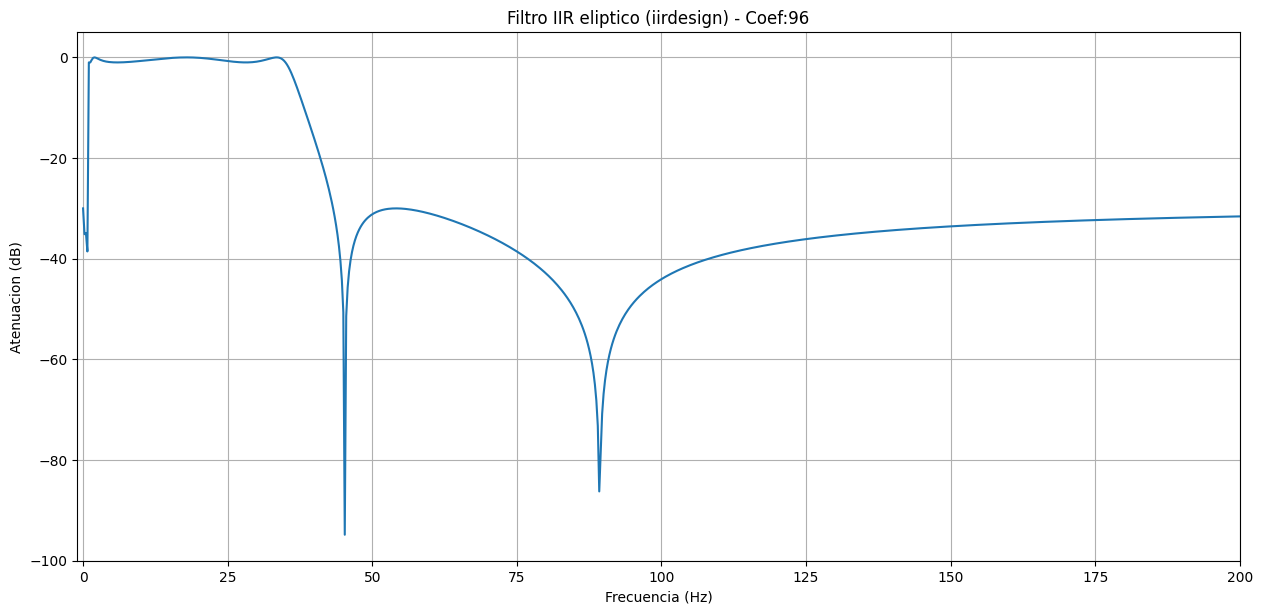

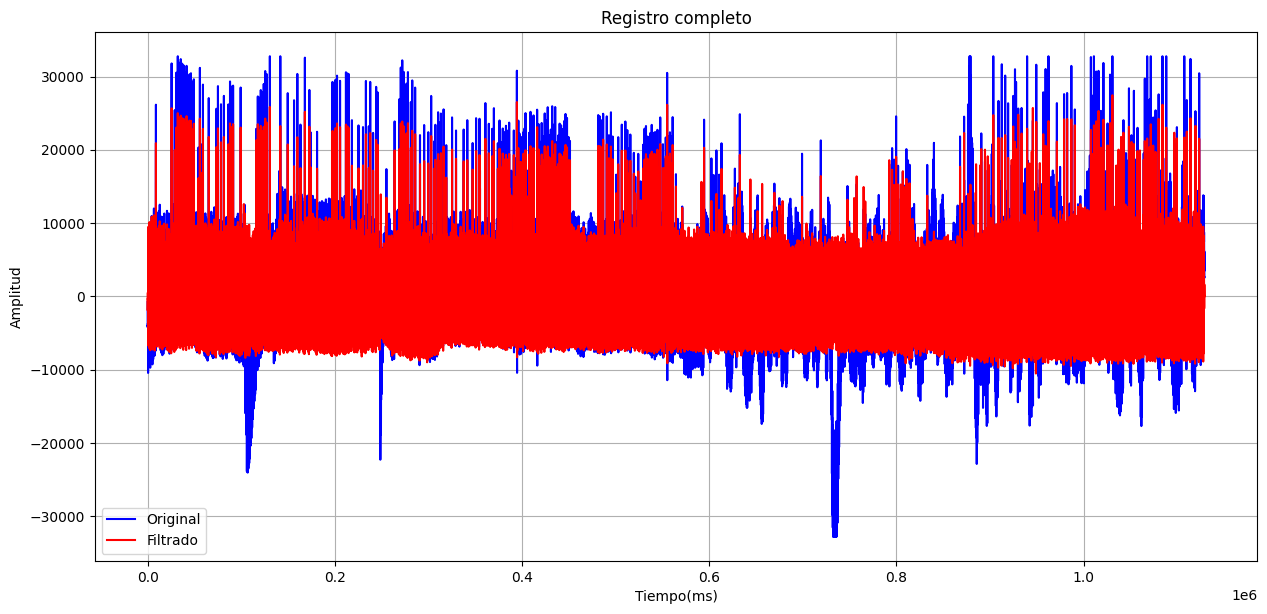

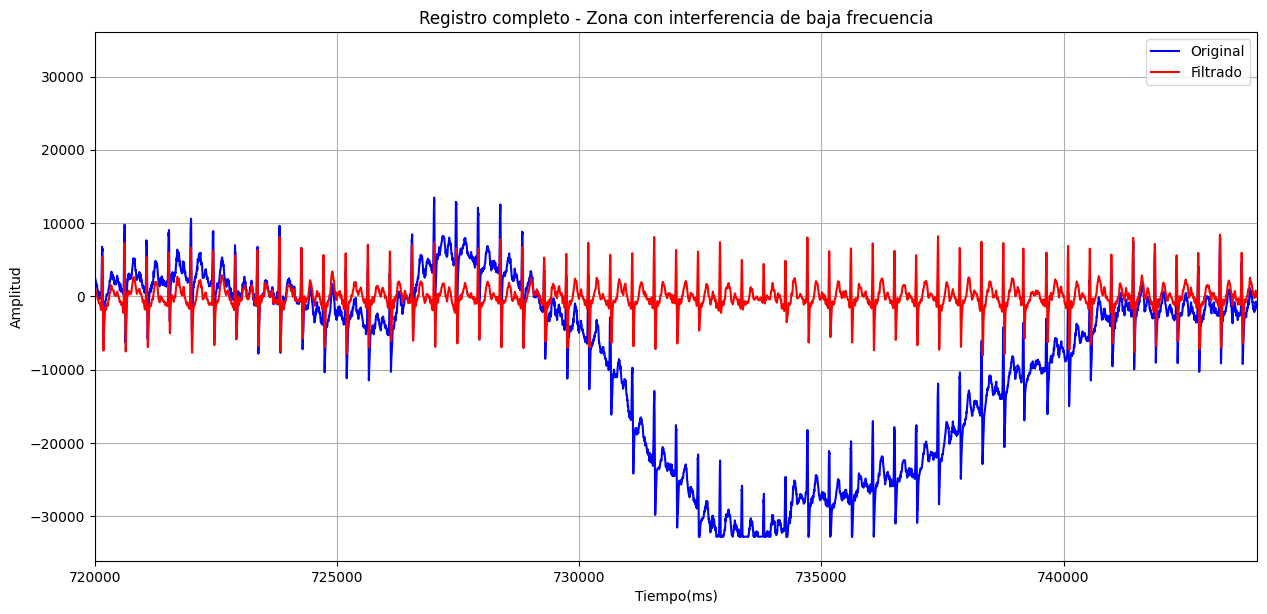

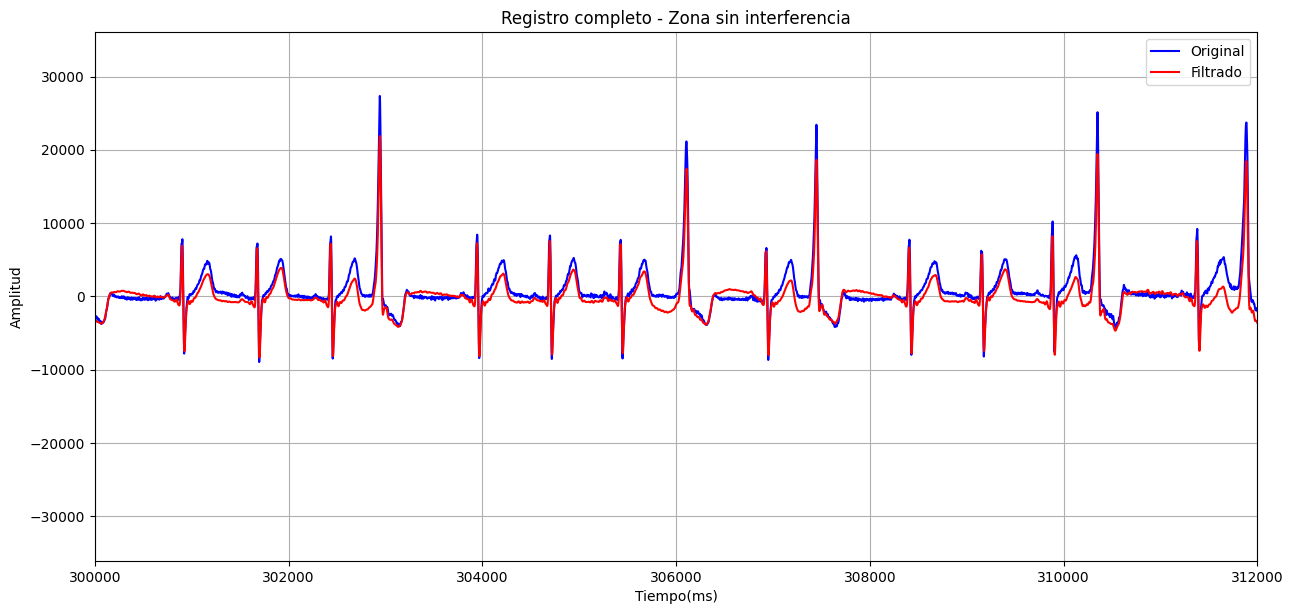

In [59]:
#%%         IIR 2
filtro2 = sg.iirdesign(wp=[fp0,fp1], ws=[fs0,fs1], gpass=gainp, gstop=gains, ftype='ellip', output='sos')
w2, h2 = sg.sosfreqz(filtro2, worN=2000, fs=fs)

plt.figure(3, figsize=(15, 7), dpi=100)
plt.plot(w2, 20*np.log10(np.abs(h2)))
plt.grid()
plt.title(f"Filtro IIR eliptico (iirdesign) - Coef:{len(filtro[:,0])*len(filtro[0,:])}")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")
plt.xlim(-1,200)
plt.ylim(-100,5)

ecg_filtrado = sg.sosfiltfilt(filtro2, ecg, axis=0)

plt.figure(4, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()

plt.figure(10, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo - Zona con interferencia de baja frecuencia")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()
plt.xlim(zonas_con_interf_baja_frec[0])

plt.figure(11, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo - Zona sin interferencia")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()
plt.xlim(zonas_sin_interf[0])

load_ipython_extension()

<IPython.core.display.Javascript object>

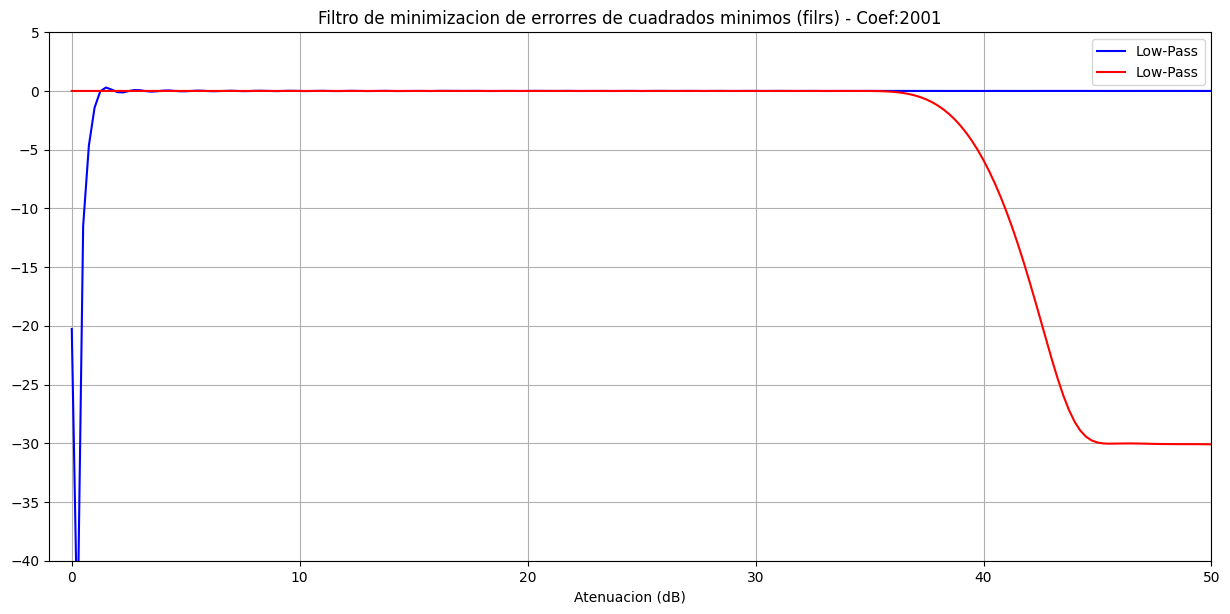

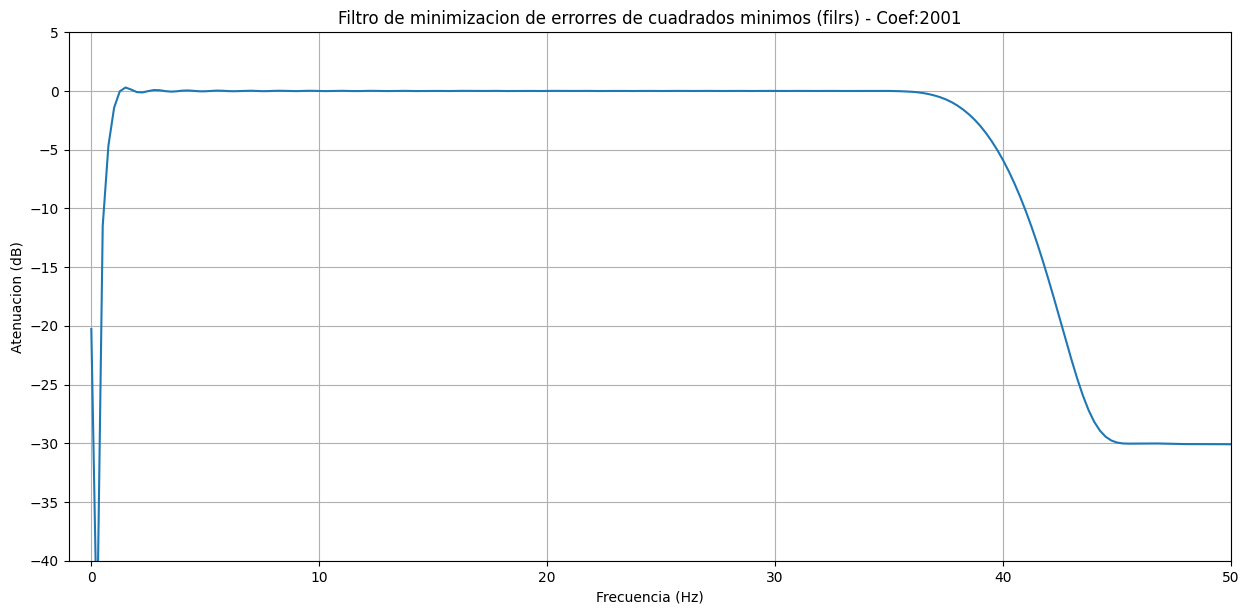

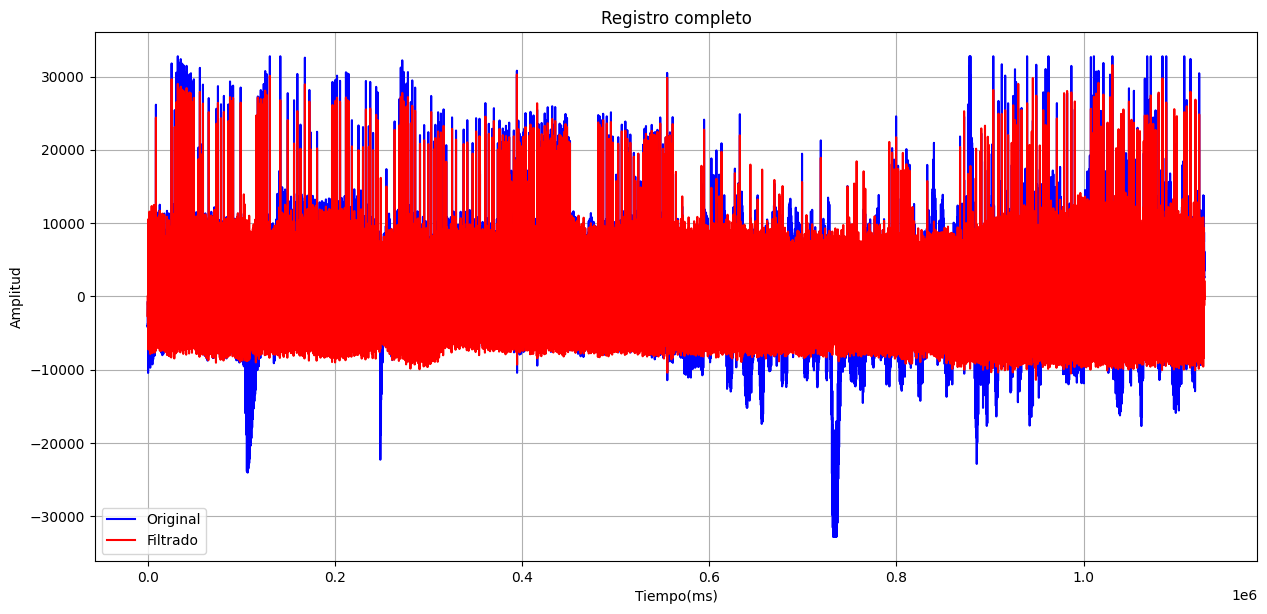

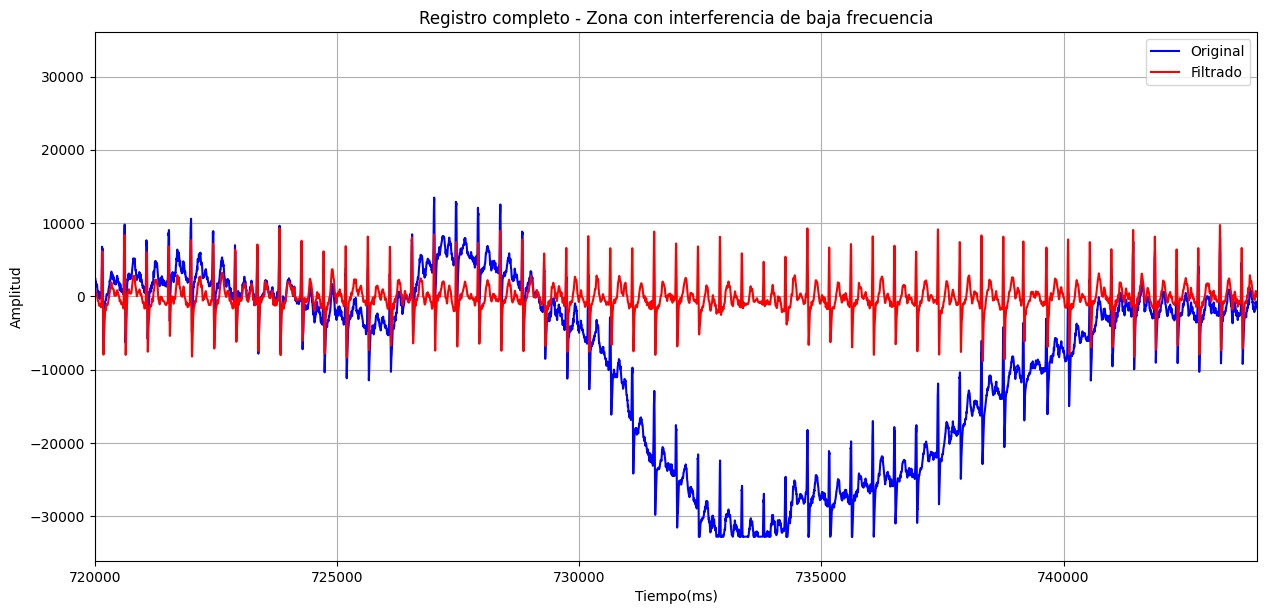

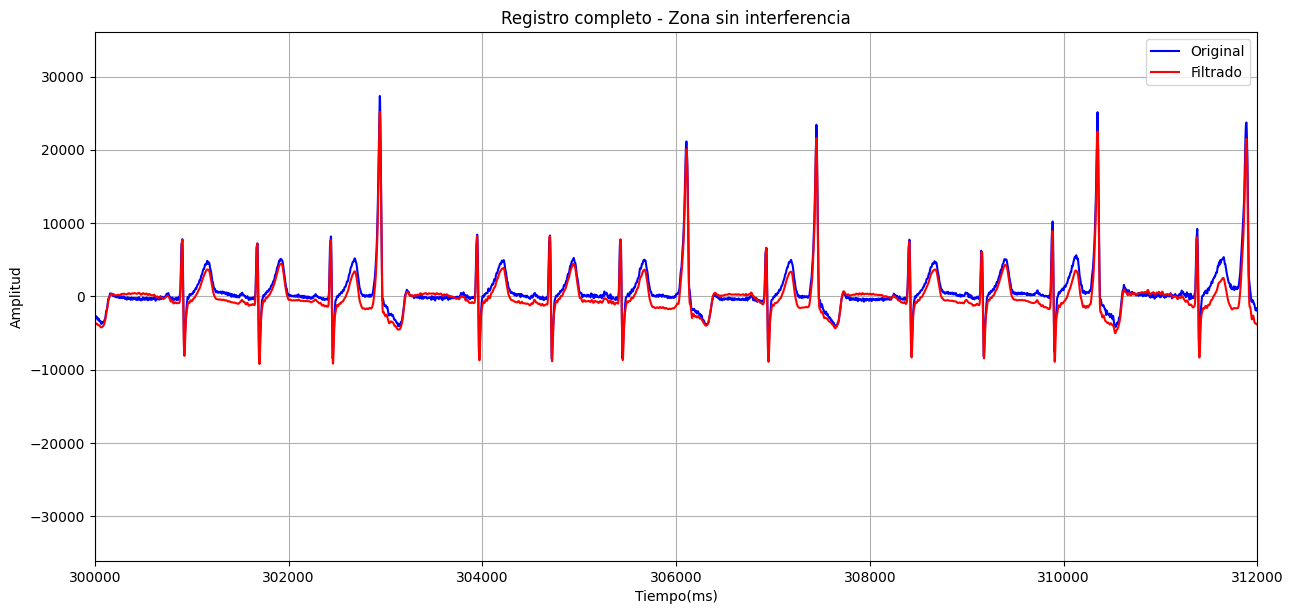

In [60]:
#%%         FIR 1
coef1 = 1501
frec = np.array([0.0, ws0, wp0, nyq])
gain = np.array([-200, -gains, 0, 0])
gain = 10**(gain/20)

fl_firls_hp = sg.firls(numtaps=coef1, bands=frec, desired=gain, fs=fs)
w_hp, h_hp = sg.freqz(fl_firls_hp, worN=2000, fs=fs)

coef2 = 501
frec = np.array([0.0, wp1, ws1, nyq])
gain = np.array([0, 0, -gains, -200])
gain = 10**(gain/20)

fl_firls_lp = sg.firls(numtaps=coef2, bands=frec, desired=gain, fs=fs)
w_lp, h_lp = sg.freqz(fl_firls_lp, worN=2000, fs=fs)

plt.figure(5, figsize=(15, 7), dpi=100)
plt.plot(w_hp, 20*np.log10(np.abs(h_hp)), 'b', label="Low-Pass")
plt.plot(w_lp, 20*np.log10(np.abs(h_lp)), 'r', label="Low-Pass")
plt.grid()
plt.title(f"Filtro de minimizacion de errorres de cuadrados minimos (filrs) - Coef:{coef1+coef2-1}")
plt.xlabel("Frecuencia (Hz)")
plt.xlabel("Atenuacion (dB)")
plt.xlim(-1,50)
plt.ylim(-40,5)
plt.legend()

fl_firls_bp = np.polymul(fl_firls_lp, fl_firls_hp)
w3, h3 = sg.freqz(fl_firls_bp, worN=2000, fs=fs)

plt.figure(6, figsize=(15, 7), dpi=100)
plt.plot(w3, 20*np.log10(np.abs(h3)))
plt.grid()
plt.title(f"Filtro de minimizacion de errorres de cuadrados minimos (filrs) - Coef:{coef1+coef2-1}")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")
plt.xlim(-1,50)
plt.ylim(-40,5)

ecg_filtrado = sg.filtfilt(fl_firls_bp, 1, ecg, axis=0)

plt.figure(7, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()

plt.figure(10, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo - Zona con interferencia de baja frecuencia")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()
plt.xlim(zonas_con_interf_baja_frec[0])

plt.figure(11, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo - Zona sin interferencia")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()
plt.xlim(zonas_sin_interf[0])

load_ipython_extension()

<IPython.core.display.Javascript object>

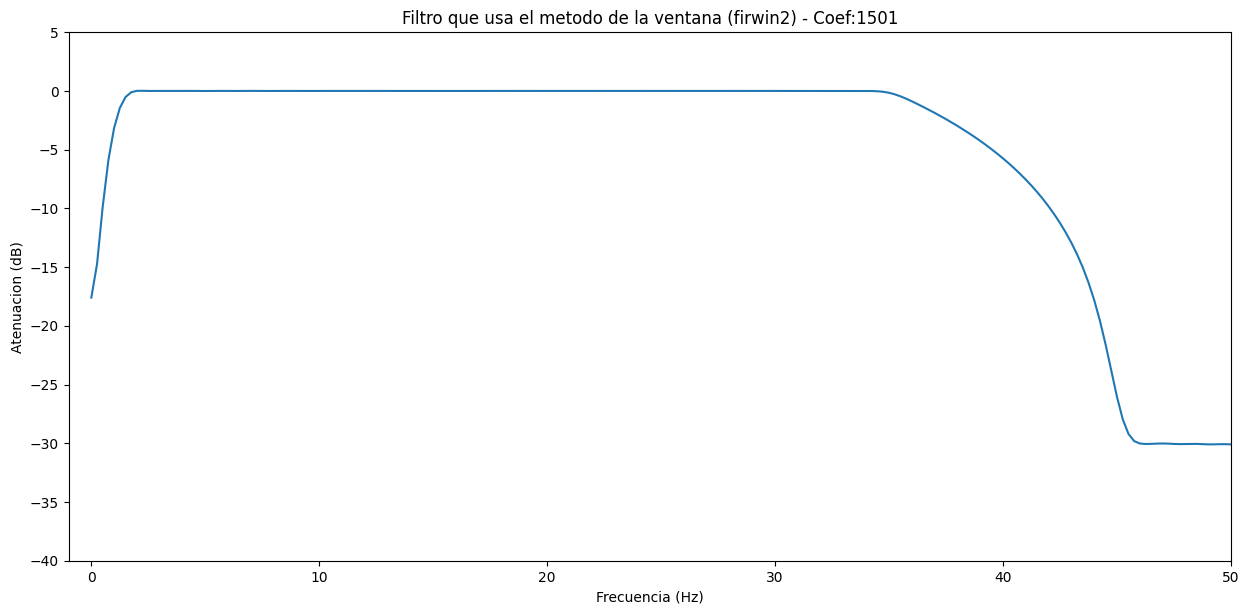

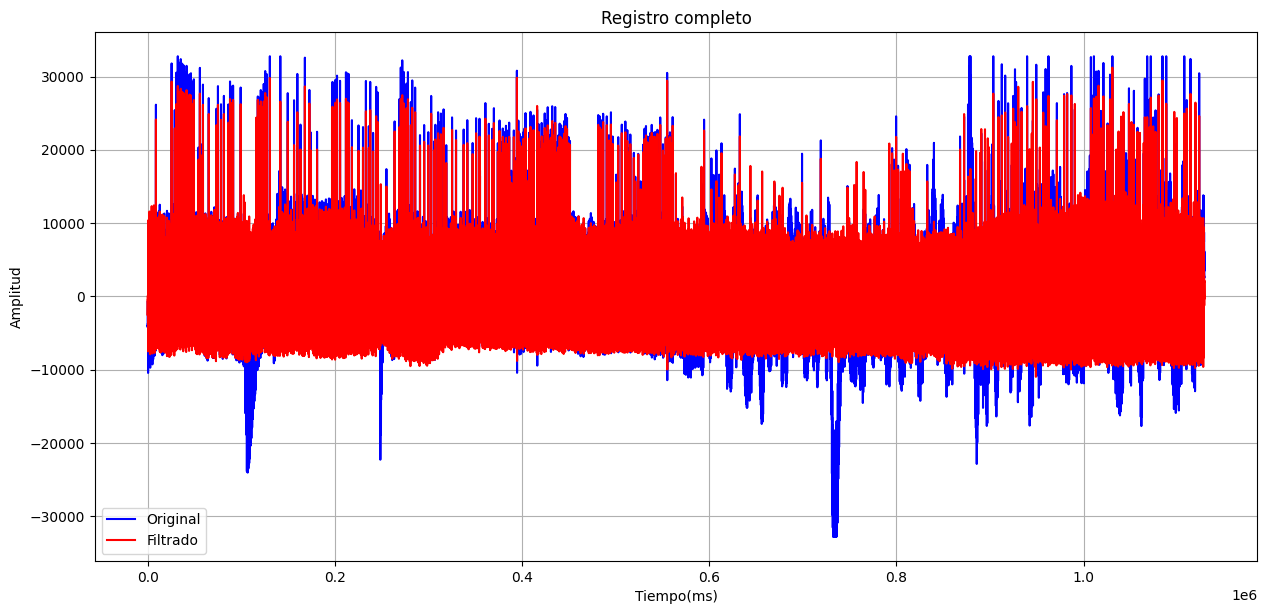

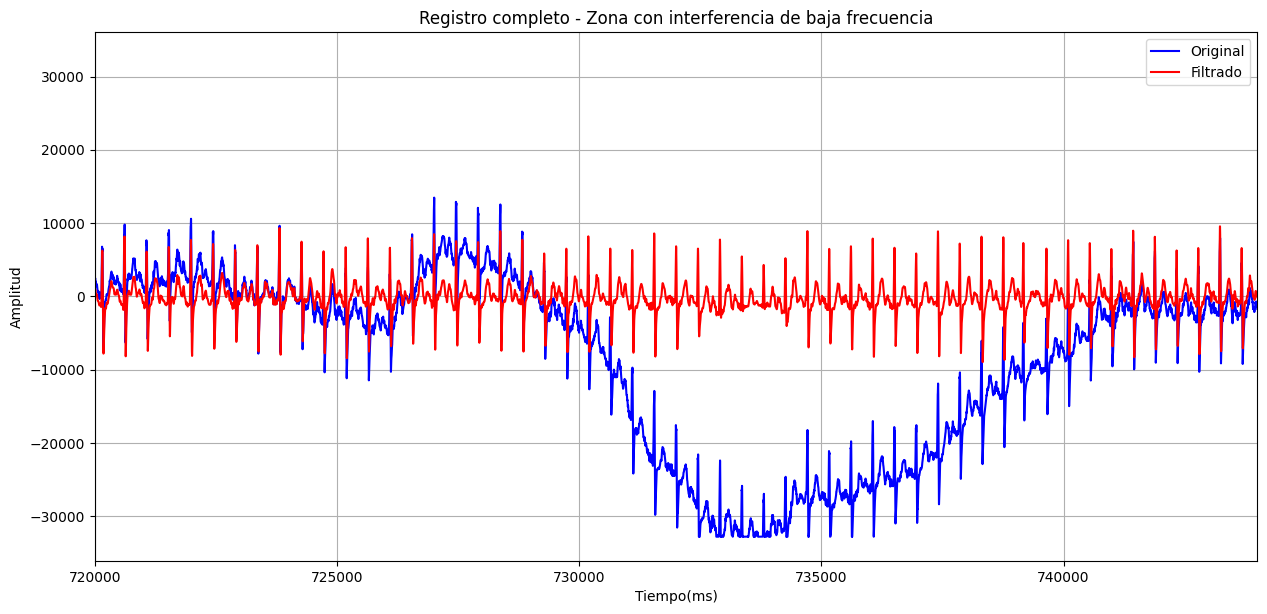

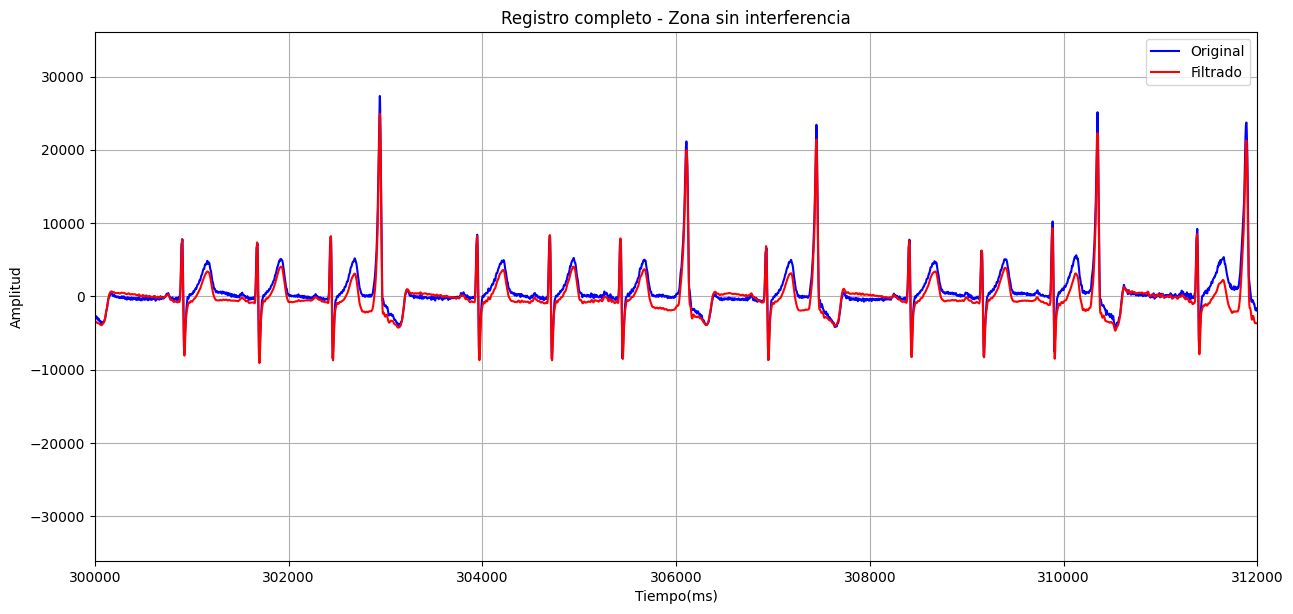

In [61]:
#%%         FIR 2
coef = 1501
frec = np.array([0, fs0, fp0, fp1, fs1, 1.0])
gain = np.array([-200, -gains, 0, 0, -gains, -200])
gain = 10**(gain/20)
fl_fw2_bp = sg.firwin2(coef, frec, gain)
w4, h4 = sg.freqz(fl_fw2_bp, worN=2000, fs=fs)
plt.figure(8, figsize=(15, 7), dpi=100)
plt.plot(w4, 20*np.log10(np.abs(h4)))
plt.title(f"Filtro que usa el metodo de la ventana (firwin2) - Coef:{coef}")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")
plt.xlim(-1,50)
plt.ylim(-40,5)

ecg_filtrado = sg.filtfilt(fl_fw2_bp, 1, ecg, axis=0)

plt.figure(9, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()

plt.figure(10, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo - Zona con interferencia de baja frecuencia")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()
plt.xlim(zonas_con_interf_baja_frec[0])

plt.figure(11, figsize=(15, 7), dpi=100)
plt.plot(ecg, 'b', label='Original')
plt.plot(ecg_filtrado, 'r', label='Filtrado')
plt.grid()
plt.title("Registro completo - Zona sin interferencia")
plt.xlabel("Tiempo(ms)")
plt.ylabel("Amplitud")
plt.legend()
plt.xlim(zonas_sin_interf[0])

load_ipython_extension()

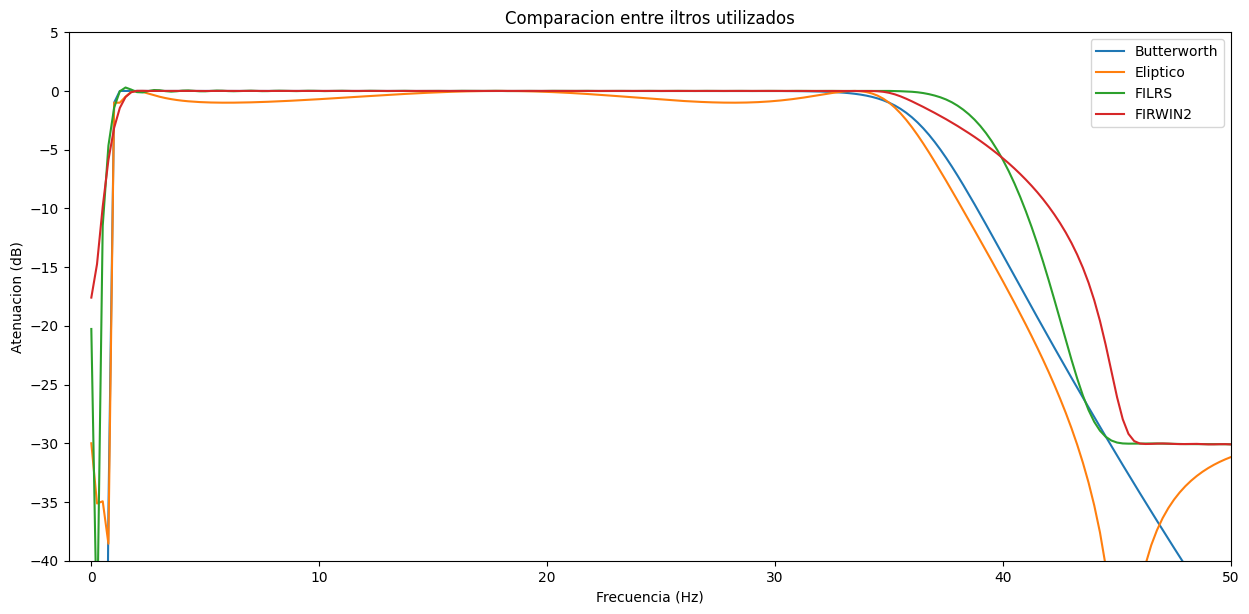

In [62]:
plt.figure(1, figsize=(15, 7), dpi=100)
old = np.seterr(divide='ignore')
plt.plot(w, 20*np.log10(np.abs(h)), label='Butterworth')
np.seterr(**old)
plt.plot(w2, 20*np.log10(np.abs(h2)), label='Eliptico')
plt.plot(w3, 20*np.log10(np.abs(h3)), label='FILRS')
plt.plot(w4, 20*np.log10(np.abs(h4)), label='FIRWIN2')
plt.title("Comparacion entre iltros utilizados")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Atenuacion (dB)")
plt.xlim(-1,50)
plt.ylim(-40,5)
plt.legend()